In [1]:
from data_io import load_tiff_files
import visualization as viz
from tma_case_lookup import get_original_tma_case

import matplotlib.pyplot as plt
from matplotlib import font_manager
import pandas as pd
import numpy as np

In [2]:
marker_panel_df = pd.read_csv('data/marker_panel.csv')
cell_meta_df = pd.read_csv('data/cell_meta.csv')
patient_meta_df = pd.read_csv('data/patient_meta.csv')

In [3]:
protein_markers = load_tiff_files('data/protein_markers')
peripherin_markers = load_tiff_files('data/peripherin_marker')
bin_nerve_masks = load_tiff_files('data/bin_nerve_mask')
cell_masks = load_tiff_files('data/cell_masks')
compartment_masks = load_tiff_files('data/compartment_masks')

In [4]:
tma_case = get_original_tma_case(tma_case_anonymized=107)

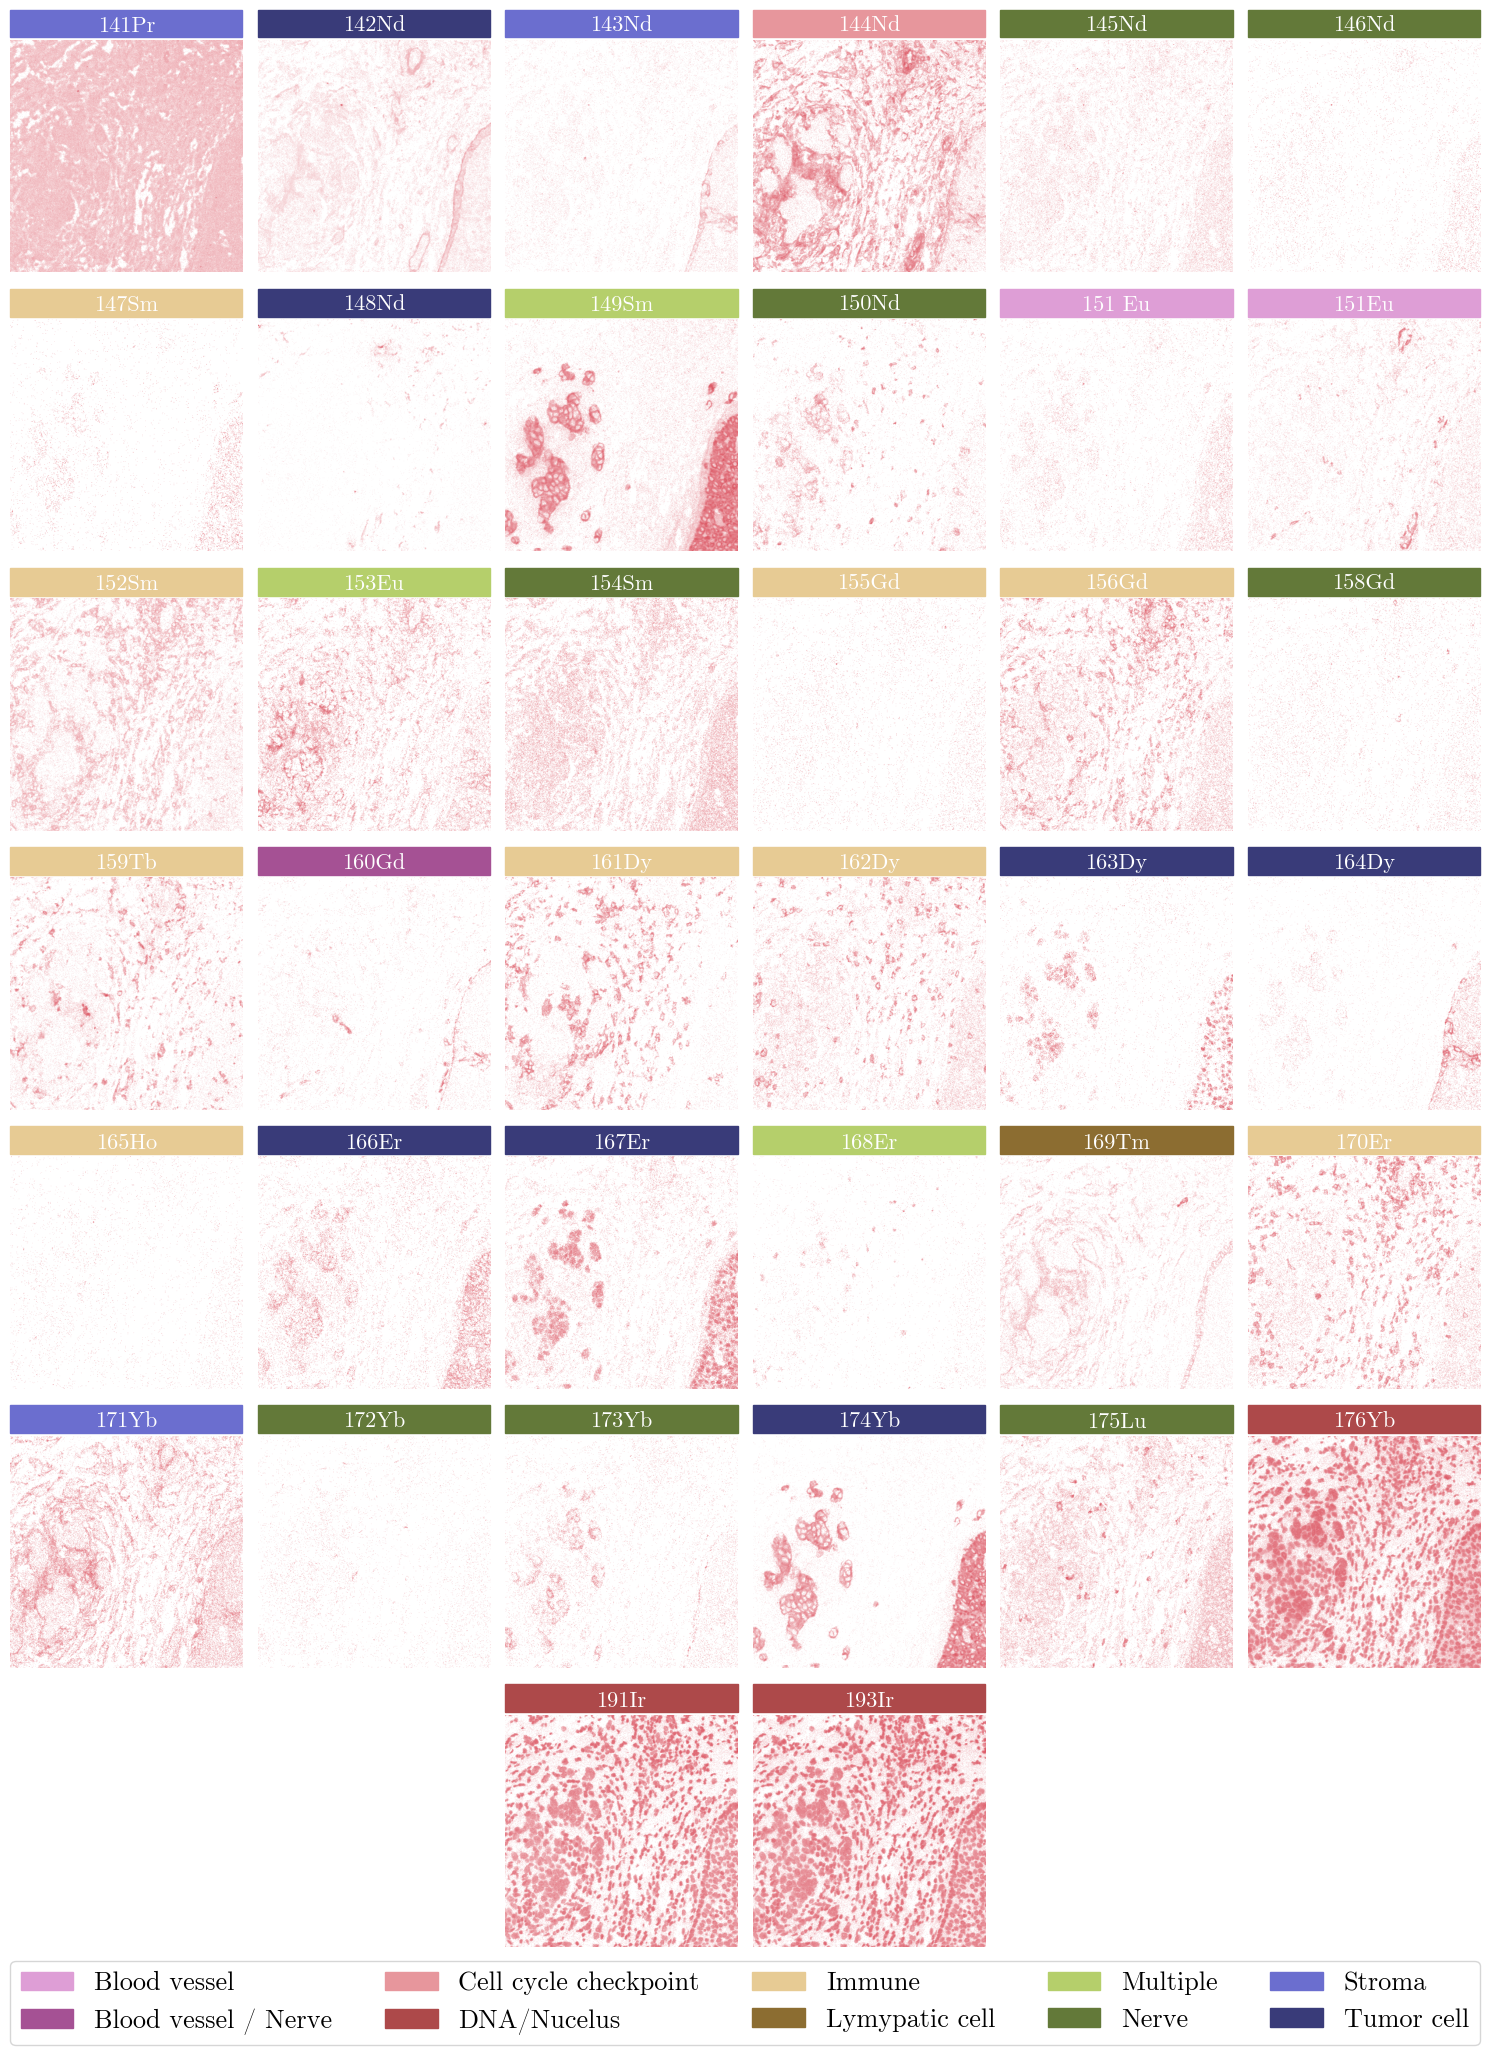

In [5]:
viz.plot_protein_markers(protein_markers[tma_case], marker_panel_df, 0, 400, 400, 800)

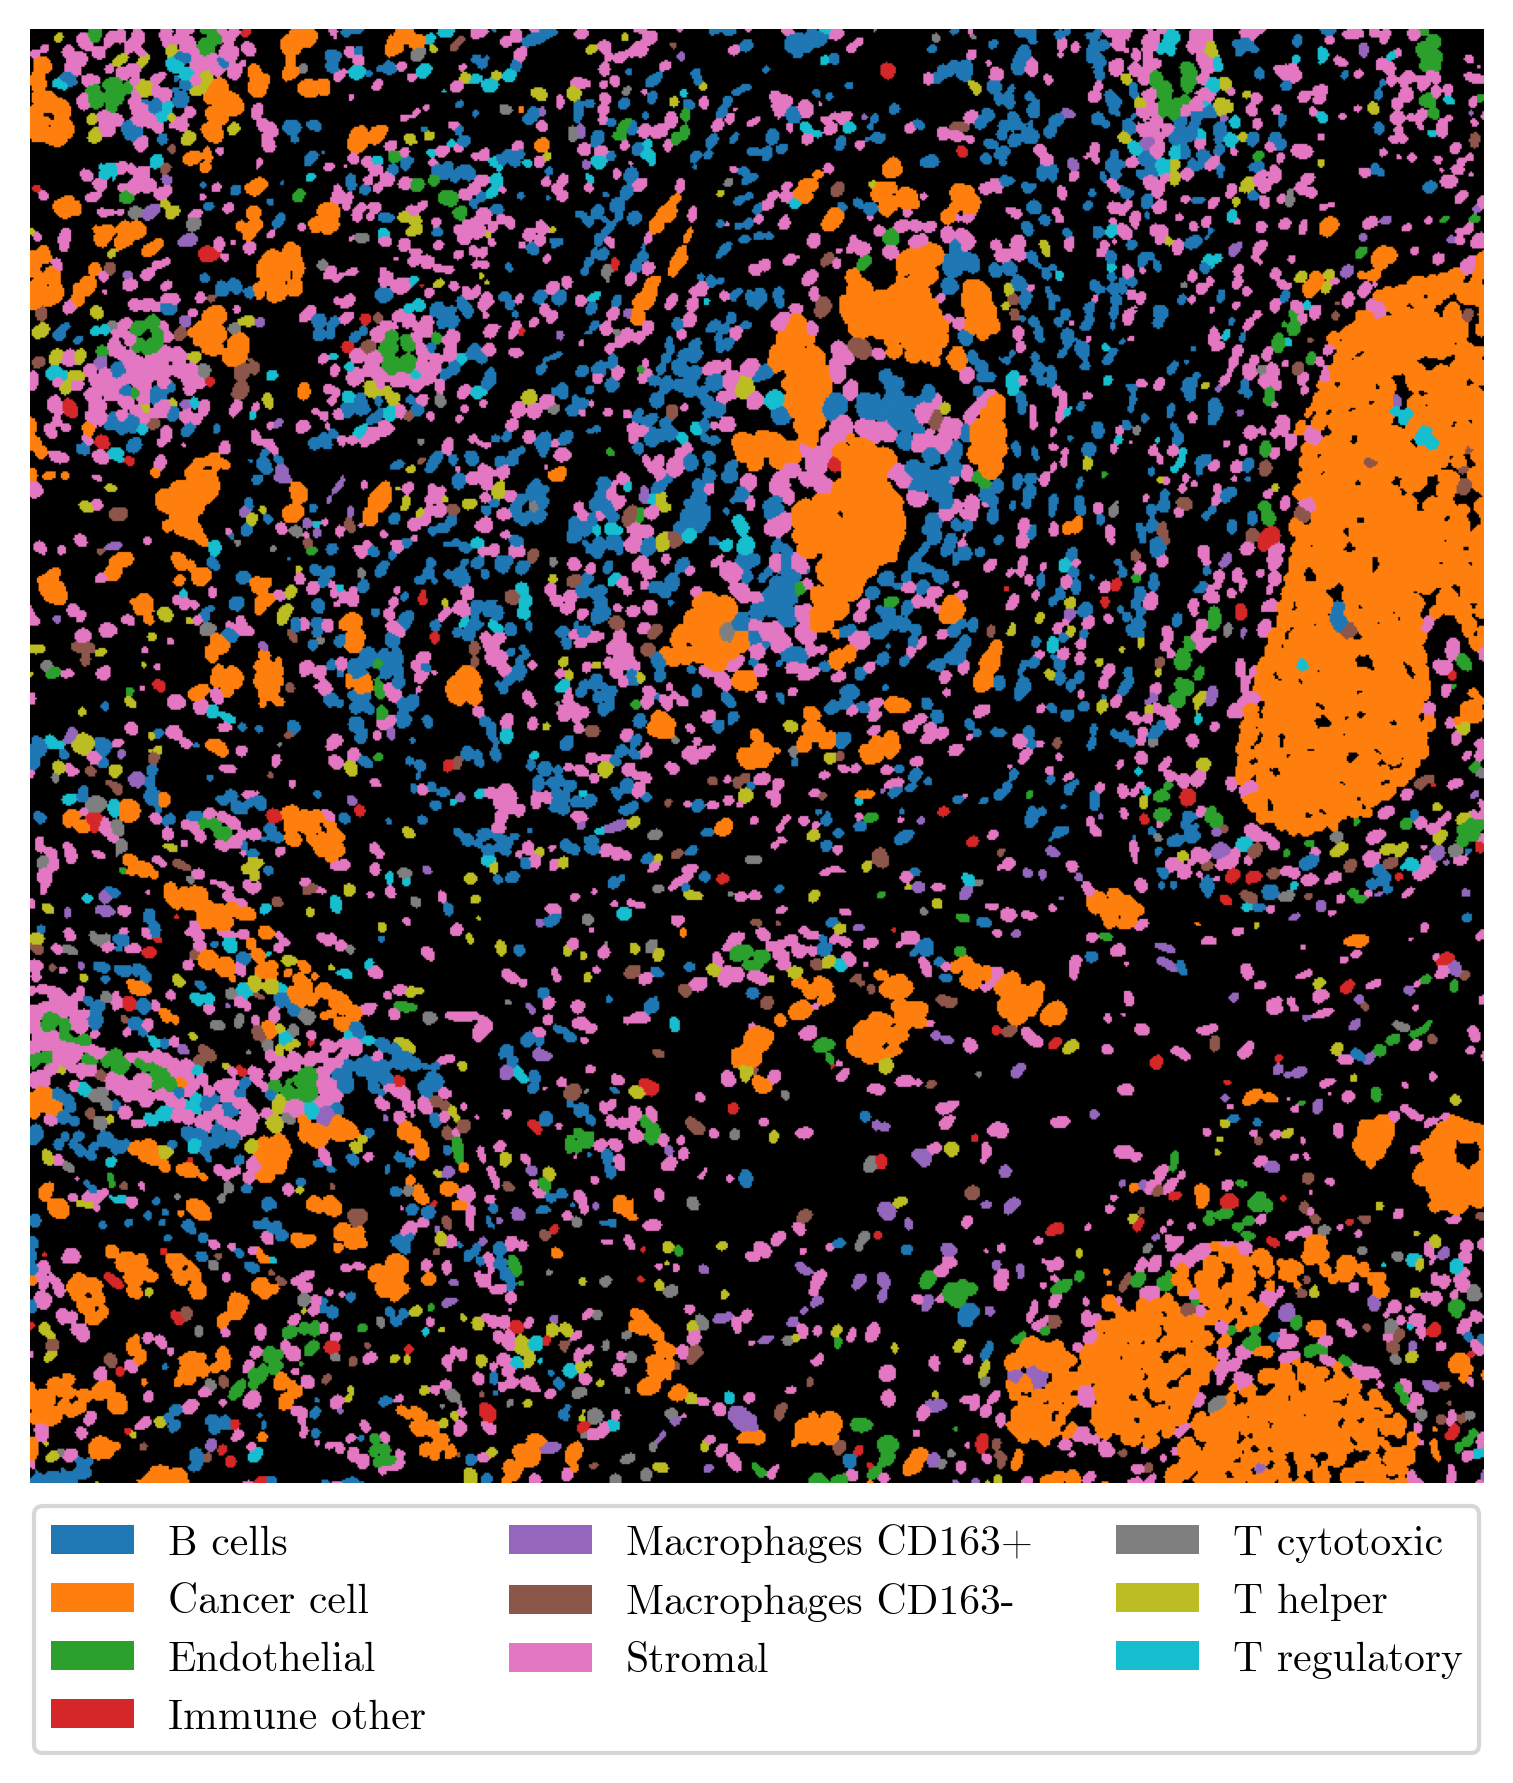

In [6]:
viz.plot_segmented_masks(cell_masks[tma_case], cell_meta_df)

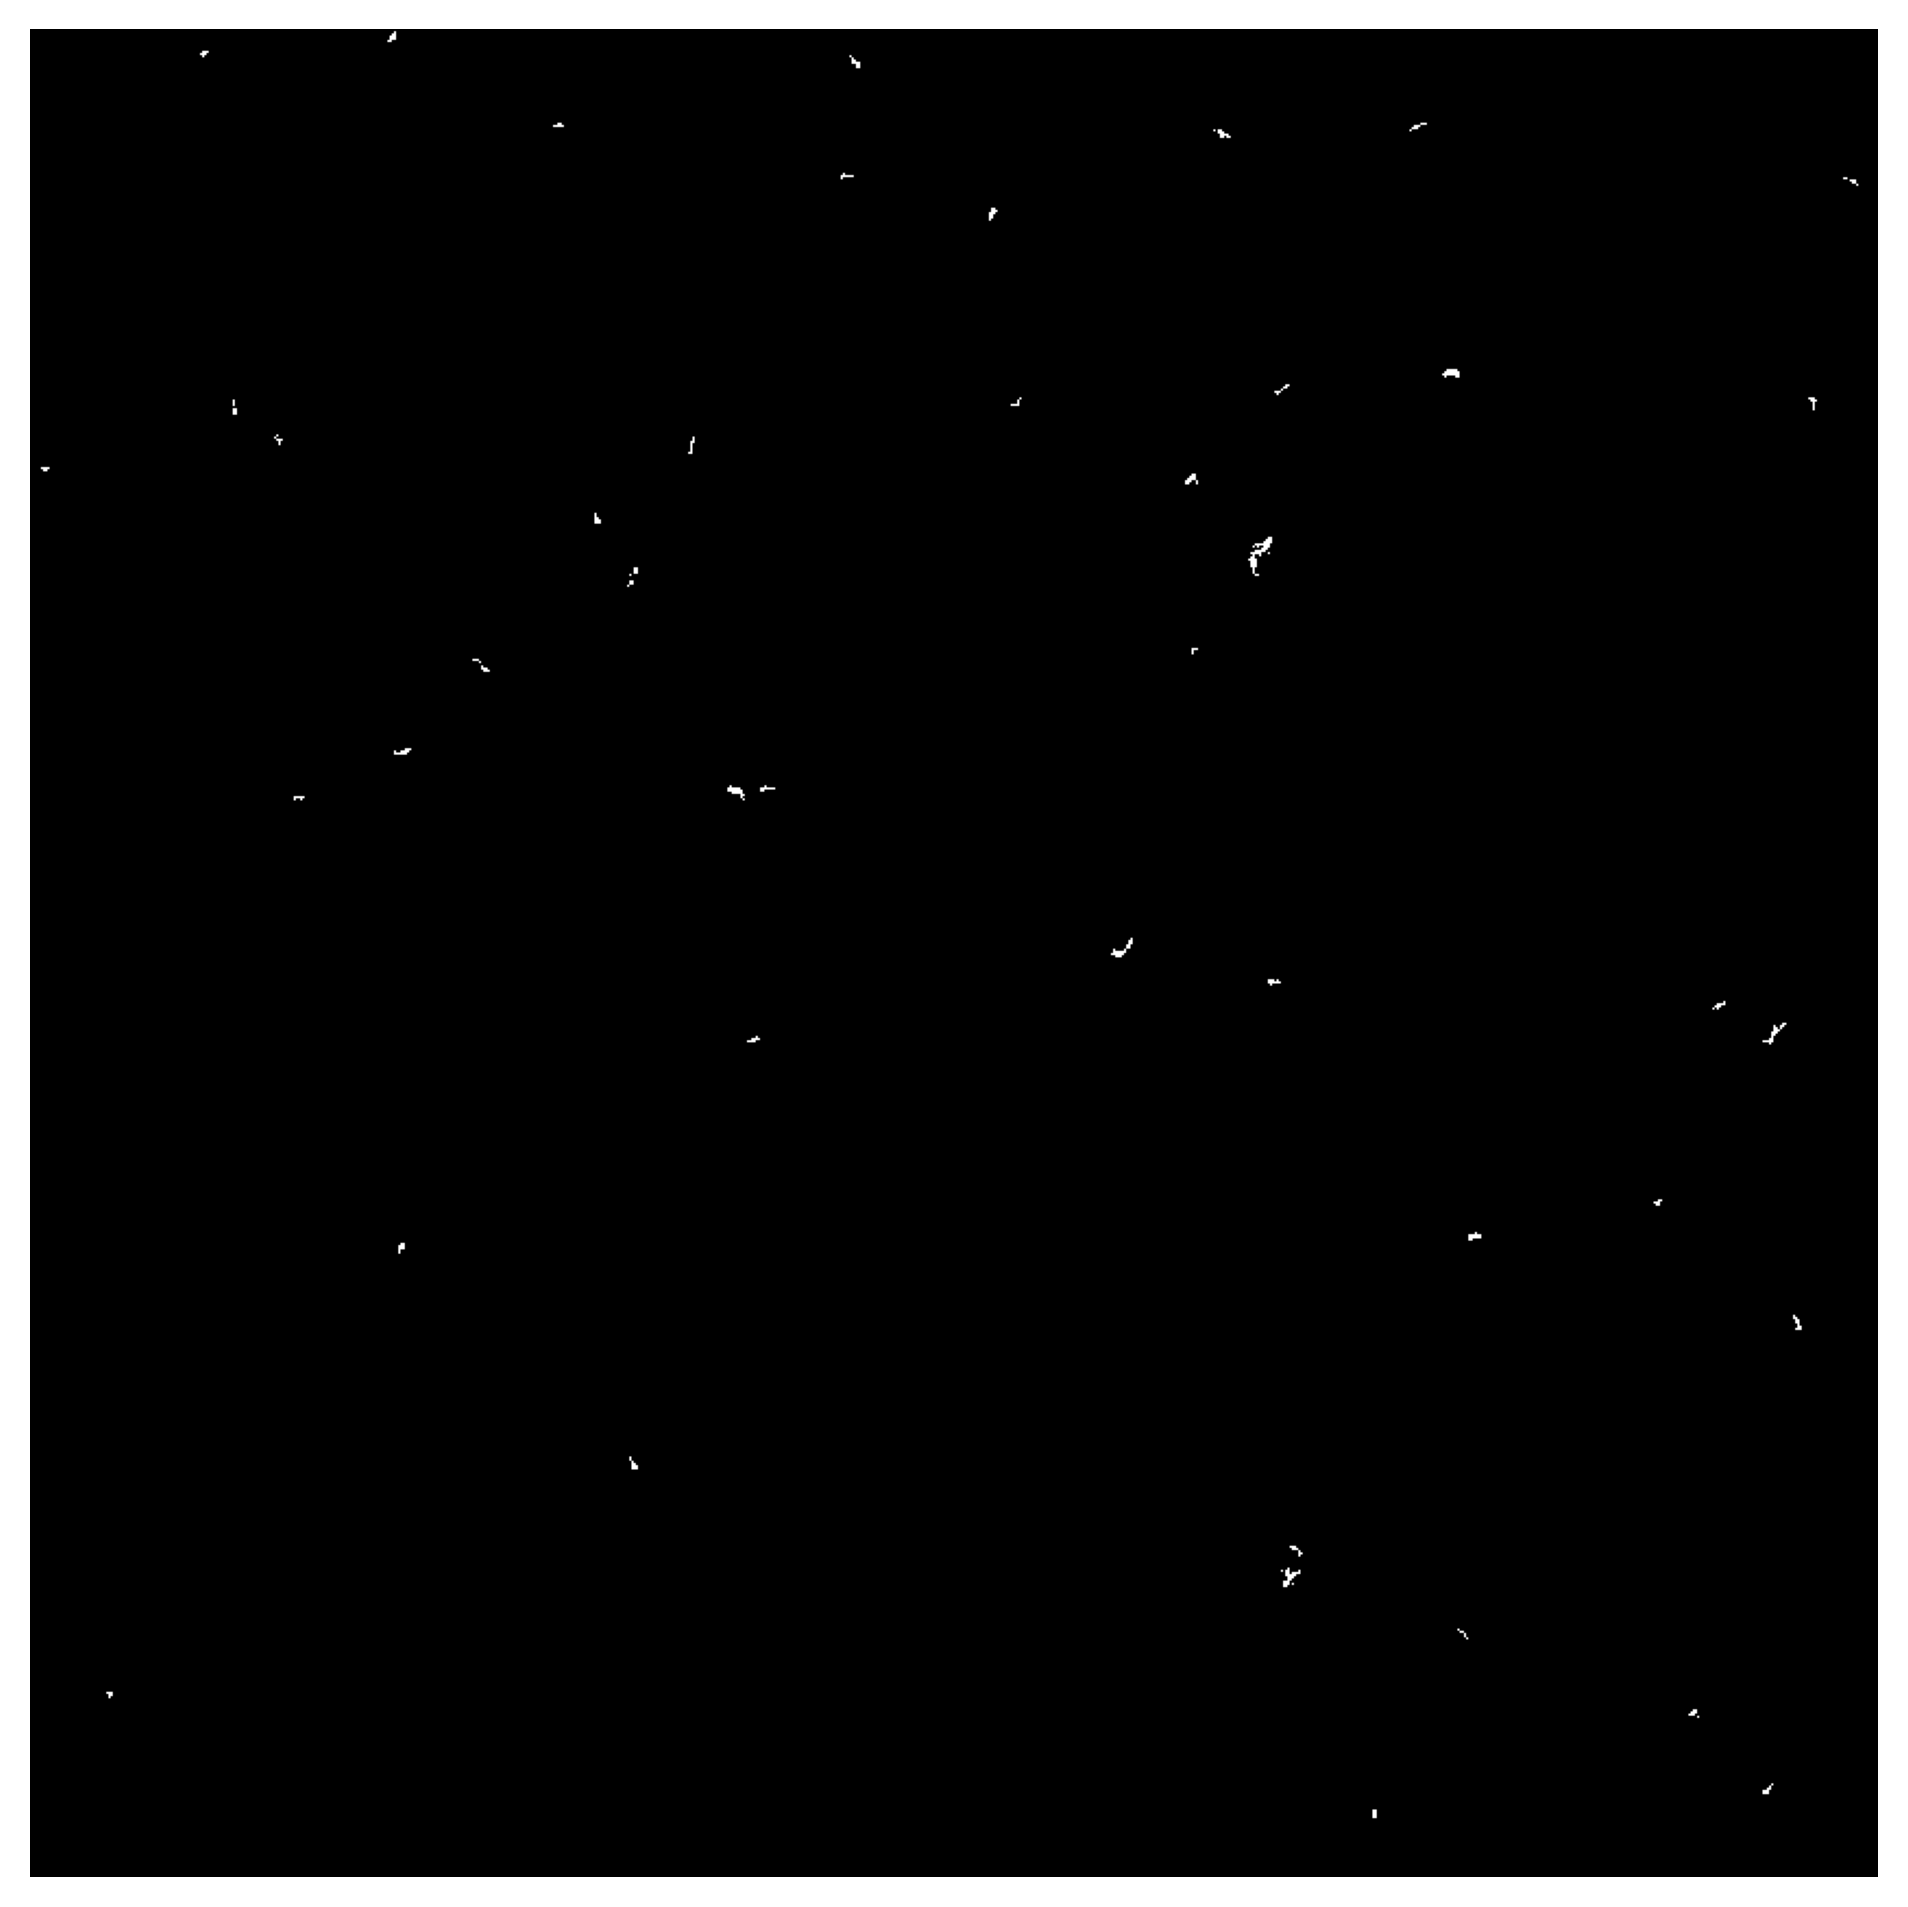

In [7]:
plt.subplots(figsize=(8, 8), dpi=300)
plt.imshow(bin_nerve_masks[tma_case], cmap='gray')
plt.axis('off')
plt.show()

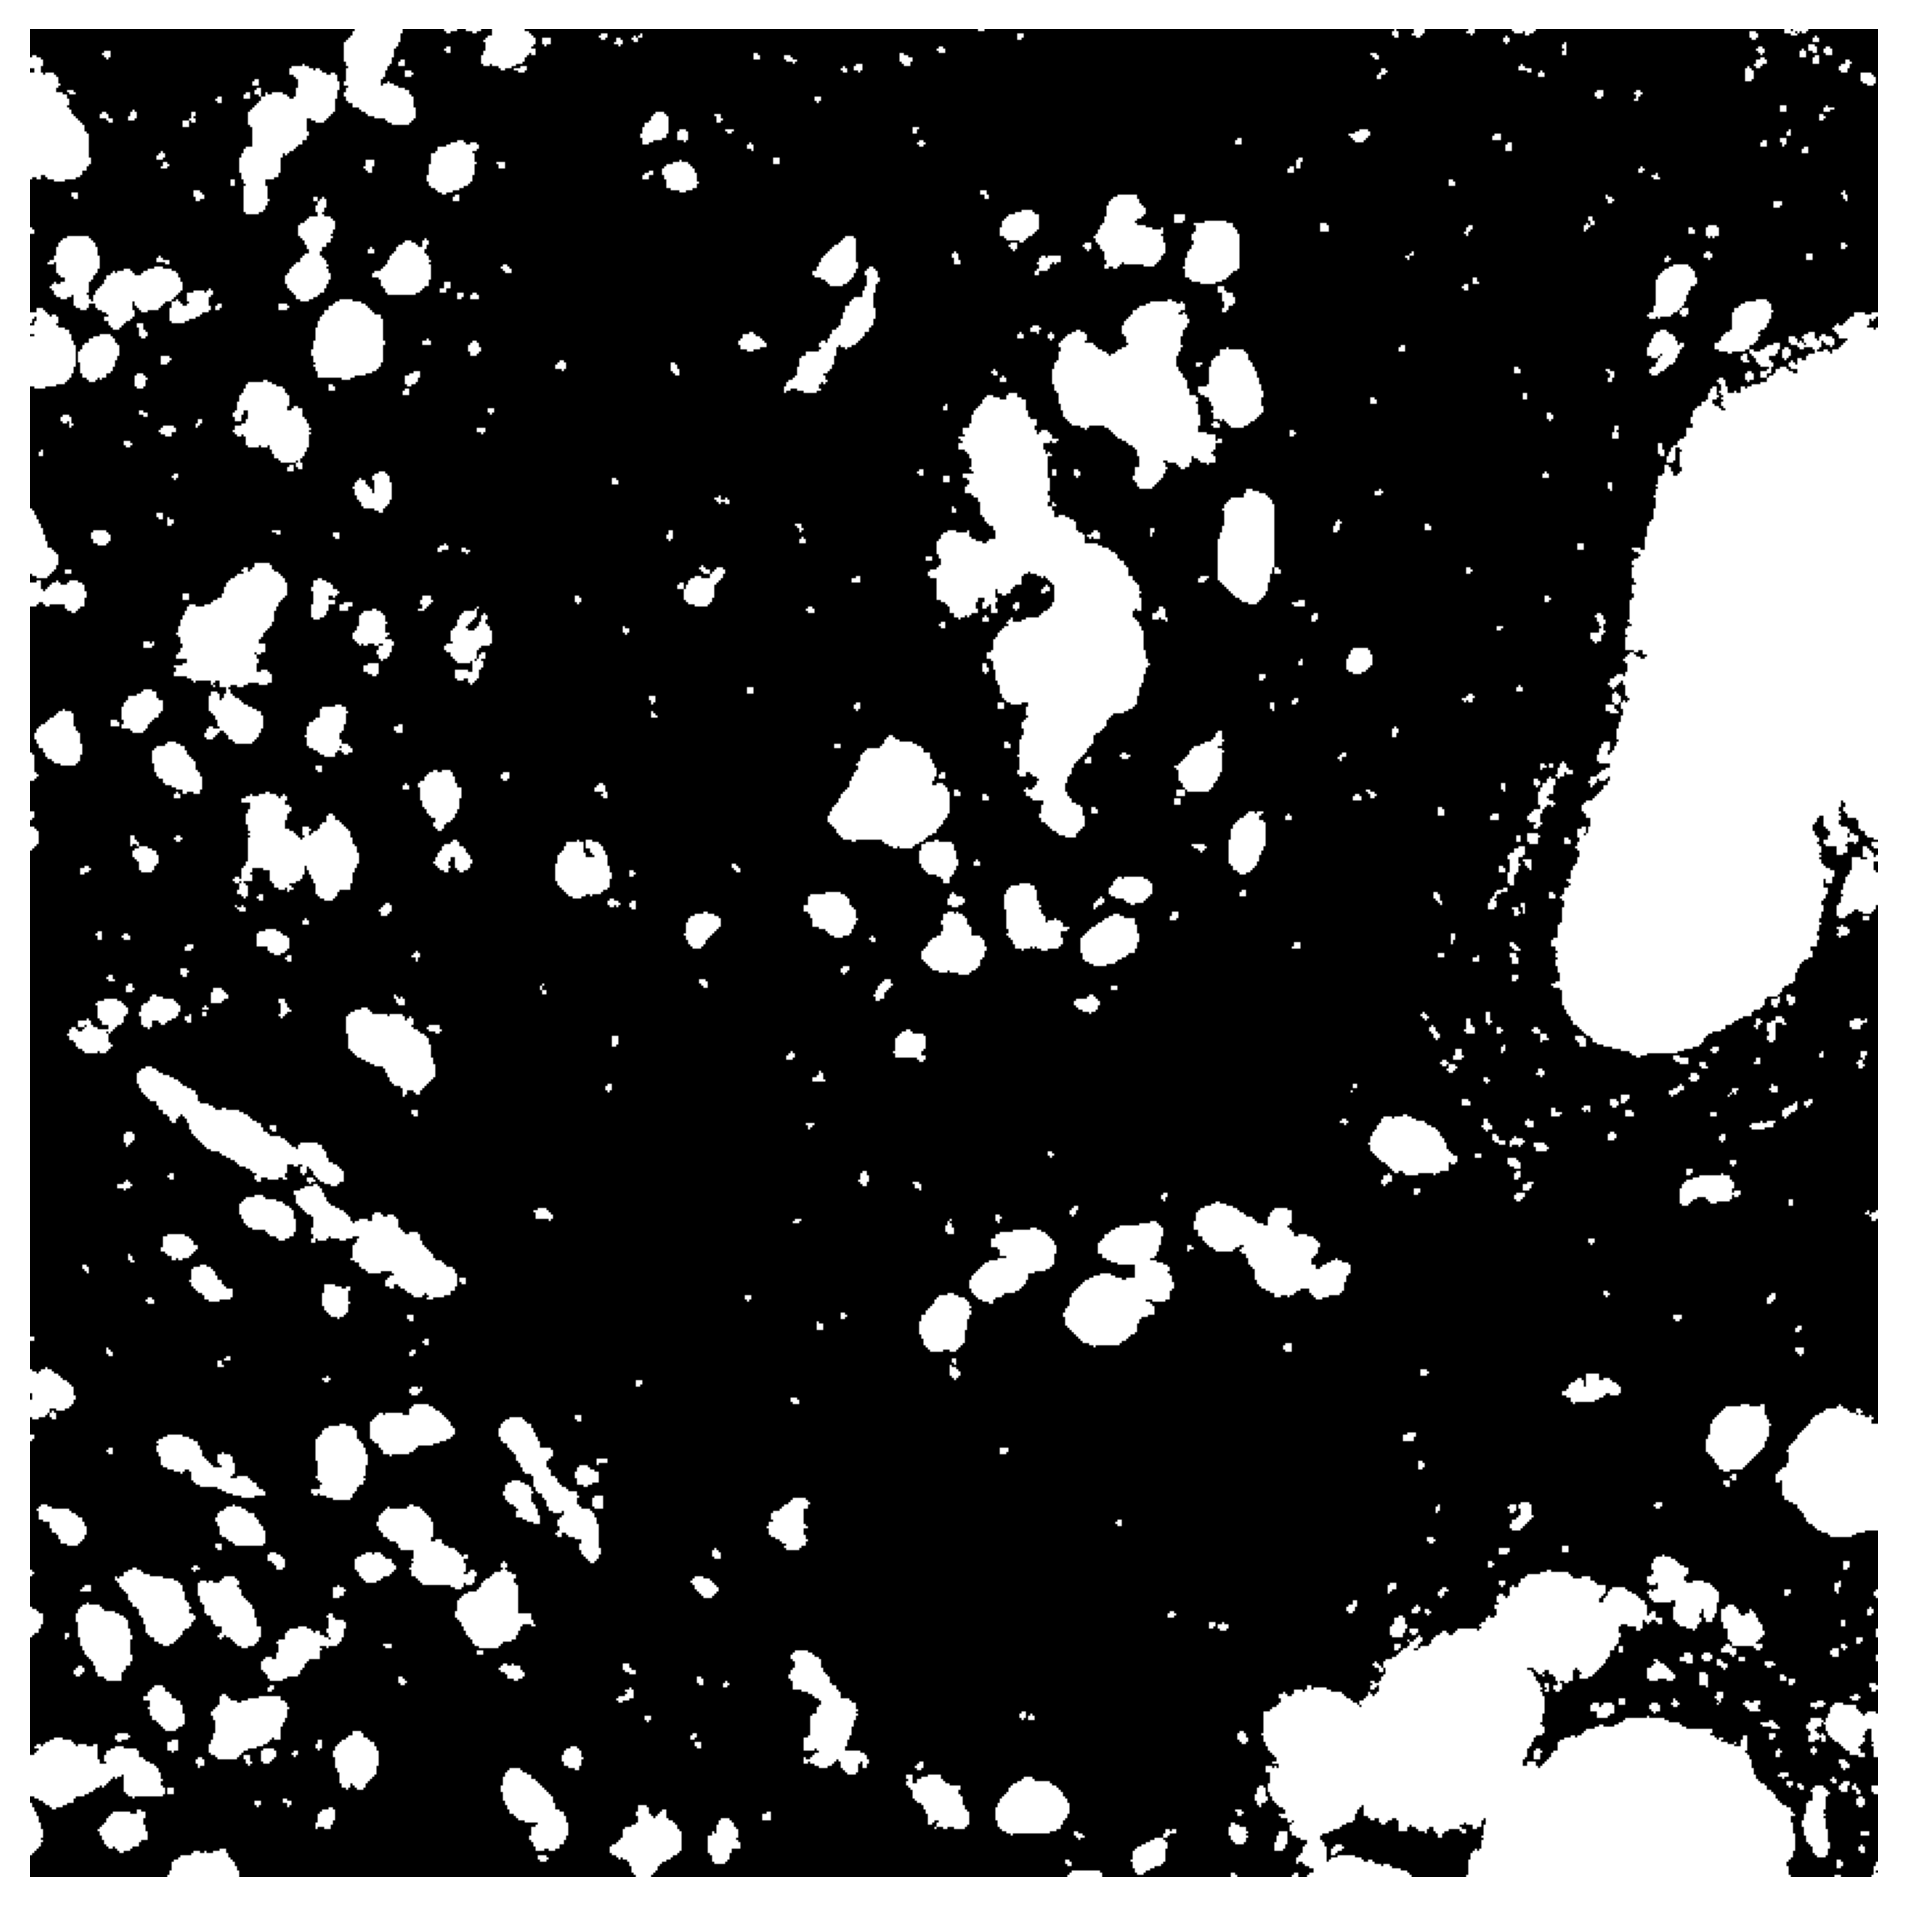

In [8]:
plt.subplots(figsize=(8, 8), dpi=300)
plt.imshow(compartment_masks[tma_case], cmap='gray')
plt.axis('off')
plt.show()

In [9]:
bin_nerve_masks_pixels = np.concatenate([nerve_mask.flatten() for nerve_mask in bin_nerve_masks.values()])

In [10]:
print("Nerve mask statistics:")
print(f"Background pixels: {np.sum(bin_nerve_masks_pixels == 0)}")
print(f"Foreground pixels: {np.sum(bin_nerve_masks_pixels == 1)}")

Nerve mask statistics:
Background pixels: 306981549
Foreground pixels: 75859


In [11]:
peripherin_values = np.concatenate([peripherin.flatten() for peripherin in peripherin_markers.values()])

In [12]:
print("Peripherin marker statistics:")
print(f"Min value: {np.min(peripherin_values)}")
print(f"Max value: {np.max(peripherin_values)}")
print(f"99th percentile: {np.percentile(peripherin_values, 99)}")
print(f"99th percentile (non-zero values): {np.percentile(peripherin_values[peripherin_values > 0], 99)}")

Peripherin marker statistics:
Min value: 0.0
Max value: 13934.0
99th percentile: 1.0
99th percentile (non-zero values): 4.0


In [13]:
cmu_font = font_manager.FontProperties(fname="cmu.serif-roman.ttf")

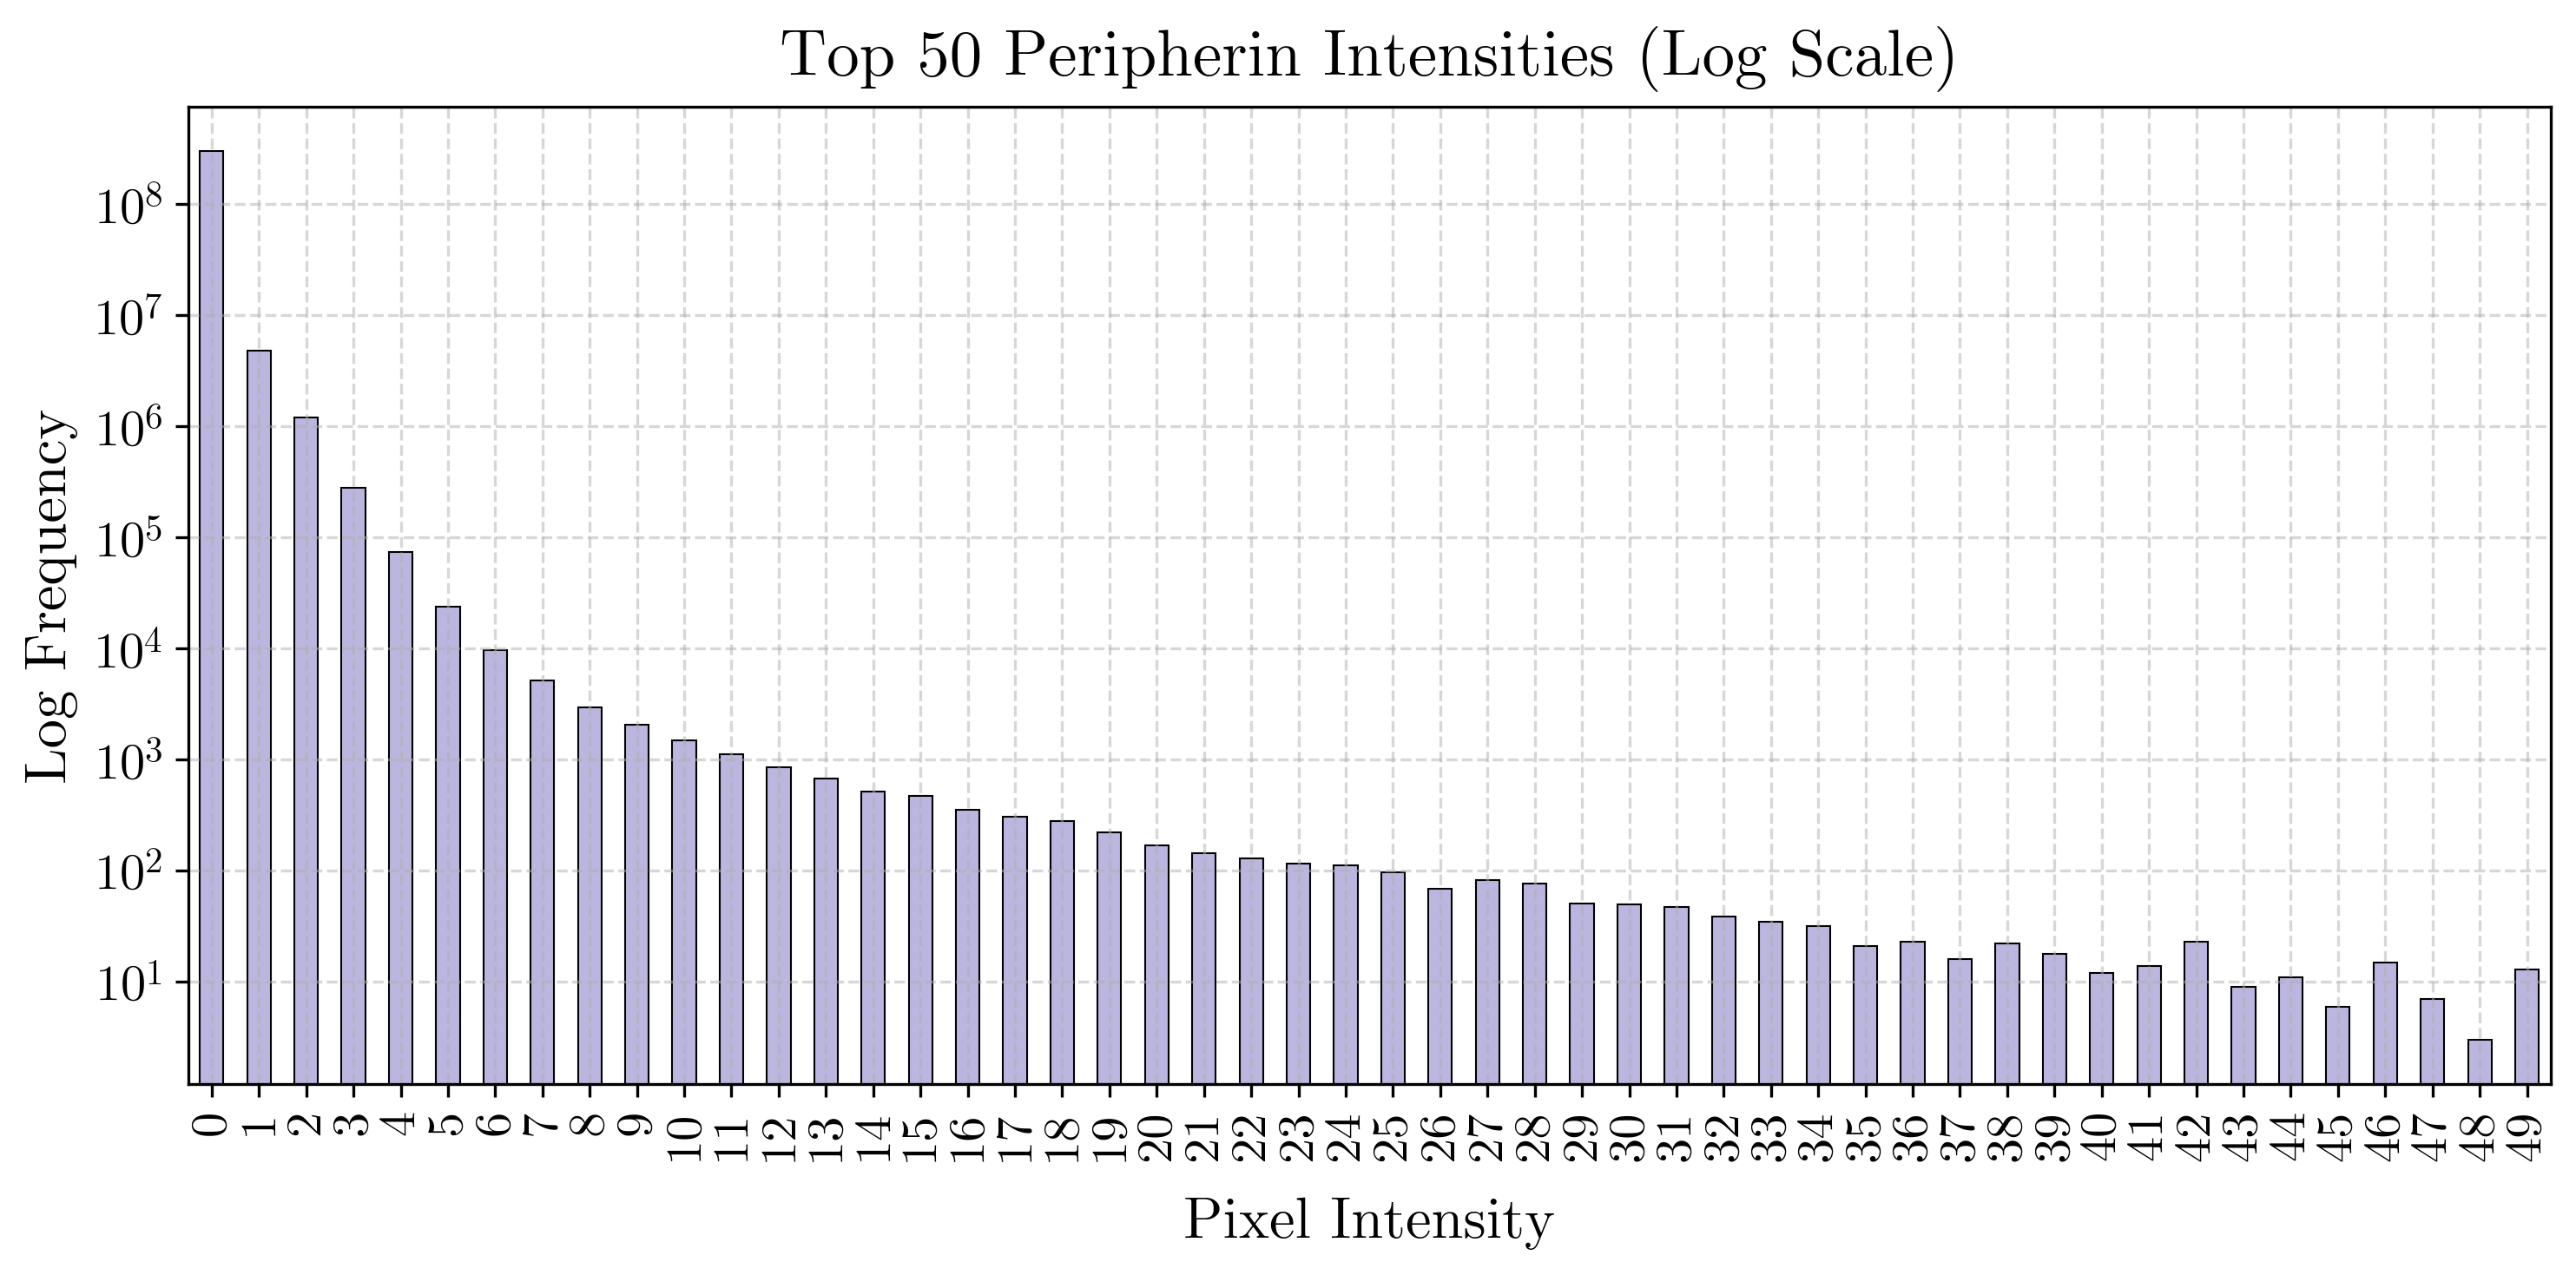

In [14]:
top_50 = pd.Series(peripherin_values).value_counts().sort_index().head(50)
top_50.index = top_50.index.astype(int)

plt.figure(figsize=(10, 5), dpi=300)
top_50.plot(kind='bar', color="#BBB6DF", edgecolor="black", linewidth=0.5)
plt.yscale('log')
plt.xlabel('Pixel Intensity', fontproperties=cmu_font, fontsize=16, labelpad=10)
plt.ylabel('Log Frequency', fontproperties=cmu_font, fontsize=16)
plt.title('Top 50 Peripherin Intensities (Log Scale)', fontproperties=cmu_font, fontsize=18, y=1.01)
plt.xticks(rotation=90, fontproperties=cmu_font, fontsize=14)
plt.yticks(fontproperties=cmu_font, fontsize=14)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.tick_params(axis='y', which='minor', length=0)
plt.show()

In [15]:
peripherin_stats_per_case = {
    case_id: {
        "min": np.min(data),
        "max": np.max(data),
        "mean": np.mean(data),
        "perc": np.percentile(data[data > 0], 99),
    }
    for case_id, data in peripherin_markers.items()
}

peripherin_stats_per_case_df = pd.DataFrame(peripherin_stats_per_case).T

In [16]:
# peripherin_stats_per_case_df

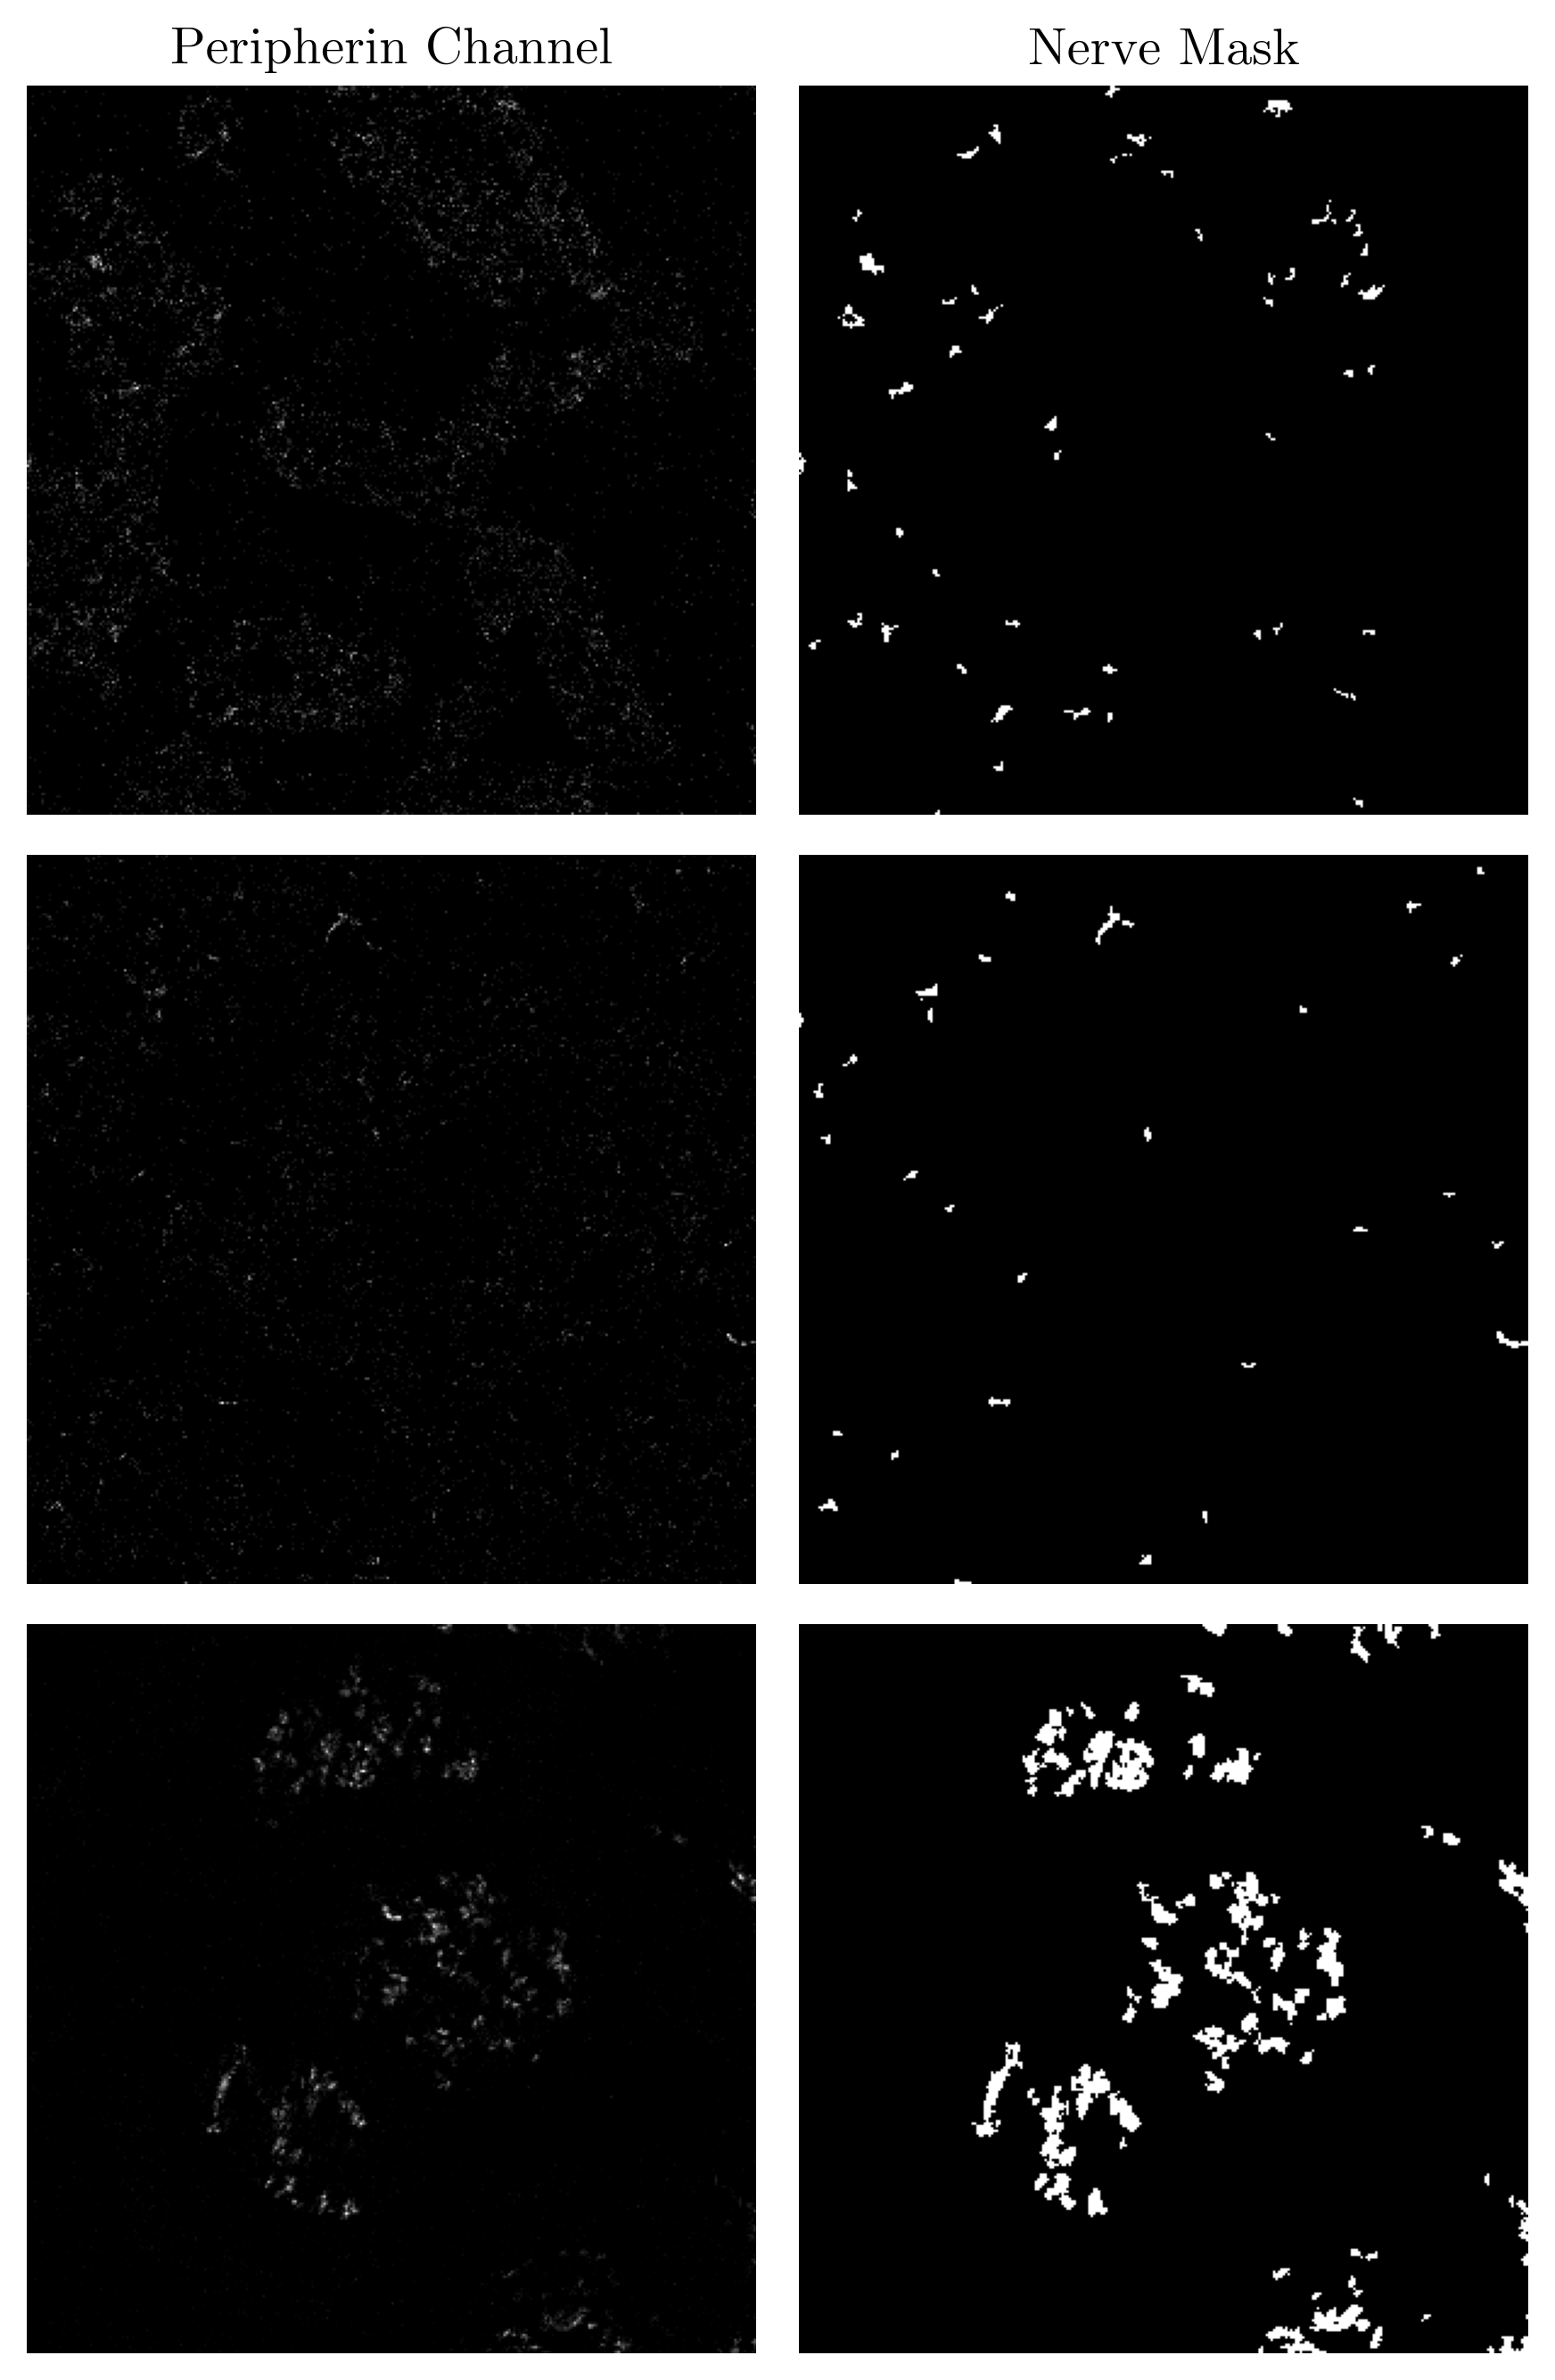

In [17]:
# Peripherin and nerve mask visualization for 3 cases with the highest amount of nerve segments
fig, axes = plt.subplots(3, 2, figsize=(6, 9), dpi=300)

tma_cases = [get_original_tma_case(tma_case_anonymized=185),
             get_original_tma_case(tma_case_anonymized=2),
             get_original_tma_case(tma_case_anonymized=183)]

for i, tma_case in enumerate(tma_cases):
    axes[i, 0].imshow(peripherin_markers[tma_case][200:500, 400:700], cmap='gray')
    if i == 0:
        axes[i, 0].set_title(f'Peripherin Channel', fontproperties=cmu_font, fontsize=14)
    axes[i, 0].axis('off')

    axes[i, 1].imshow(bin_nerve_masks[tma_case][200:500, 400:700], cmap='gray')
    if i == 0:
        axes[i, 1].set_title(f'Nerve Mask', fontproperties=cmu_font, fontsize=14)
    axes[i, 1].axis('off')
plt.tight_layout()